In [3]:
import pandas as pd

df = pd.read_csv('Student_Mental_Health_Academic_Pressure_2025.csv - Form Responses 1.csv')

df.columns = df.columns.str.strip().str.replace('\n', '').str.replace('  ', ' ')

new_names = {
    'Age Group': 'age_group',
    'Gender': 'gender',
    'Current Education Level': 'education_level',
    'How much academic pressure do you feel?': 'pressure_score',
    'How often do you feel stressed due to studies?': 'stress_frequency',
    'How many hours do you sleep on average per night?': 'sleep_hours',
    'What is the main cause of your academic stress?': 'stress_cause'
}
df.rename(columns=new_names, inplace=True)

print(df.head())

            Timestamp age_group  gender education_level  pressure_score  \
0  12/13/2025 6:18:33     15–18  Female         College               4   
1  12/13/2025 6:24:50     15–18    Male         College               4   
2  12/13/2025 6:29:50     15–18  Female      University               3   
3  12/13/2025 7:36:26       27+    Male           Other               1   
4  12/13/2025 8:01:20     15–18  Female         College               2   

  stress_frequency sleep_hours                   stress_cause  
0        Sometimes         7–8  1 .Exam and grades pressure    
1            Often         5–6      Exams and Grades Pressure  
2        Sometimes         7–8          financial conditions   
3           Always         7–8                         Other   
4        Sometimes         5–6              Prefer not to say  


In [4]:
df.head()

,Timestamp,age_group,gender,education_level,pressure_score,stress_frequency,sleep_hours,stress_cause
0,12/13/2025 6:18:33,15–18,Female,College,4,Sometimes,7–8,1 .Exam and grades pressure
1,12/13/2025 6:24:50,15–18,Male,College,4,Often,5–6,Exams and Grades Pressure
2,12/13/2025 6:29:50,15–18,Female,University,3,Sometimes,7–8,financial conditions
3,12/13/2025 7:36:26,27+,Male,Other,1,Always,7–8,Other
4,12/13/2025 8:01:20,15–18,Female,College,2,Sometimes,5–6,Prefer not to say


gender                       Female       Male
stress_category                               
Exams & Grades            33.333333  47.619048
Financial Issues          16.666667  28.571429
Other/Personal            25.000000  14.285714
Social/Parental Pressure  16.666667   0.000000
Time/Learning Issues       8.333333   9.523810


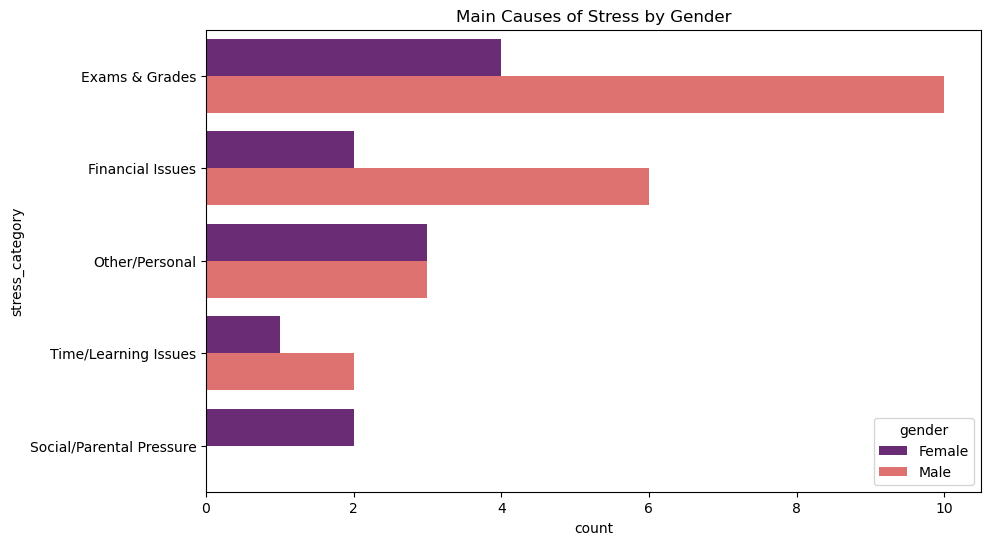

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Function to group the messy text into clean categories
def categorize_stress(cause):
    cause = str(cause).lower().strip()
    if 'exam' in cause or 'test' in cause or 'grade' in cause or 'paper' in cause:
        return 'Exams & Grades'
    elif 'financial' in cause:
        return 'Financial Issues'
    elif 'expectations' in cause or 'parents' in cause or 'competitive' in cause:
        return 'Social/Parental Pressure'
    elif 'time' in cause or 'understanding' in cause or 'difficulty' in cause:
        return 'Time/Learning Issues'
    else:
        return 'Other/Personal'

# 2. Apply the cleaning
df['stress_category'] = df['stress_cause'].apply(categorize_stress)

# 3. Create a comparison table (Percentage of gender group)
stress_by_gender = pd.crosstab(df['stress_category'], df['gender'], normalize='columns') * 100
print(stress_by_gender)

# 4. Visualization: Causes by Gender
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='stress_category', hue='gender', palette='magma')
plt.title('Main Causes of Stress by Gender')
plt.savefig('stress_causes_by_gender.png')

age_group
Under 15    4.50
15–18       4.05
19–22       3.75
23–26       3.00
27+         2.50
Name: pressure_score, dtype: float64


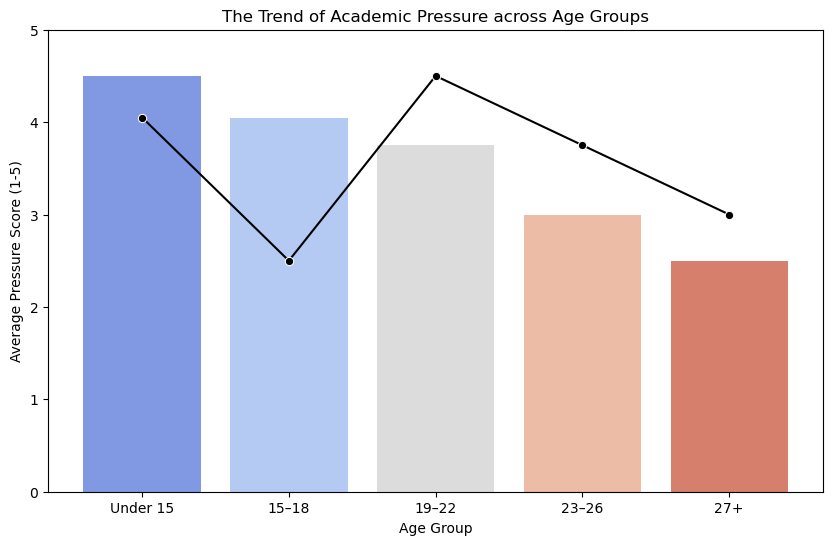

In [8]:
age_order = ['Under 15', '15–18', '19–22', '23–26', '27+']


age_summary = df.groupby('age_group')['pressure_score'].mean().reindex(age_order)
print(age_summary)

plt.figure(figsize=(10, 6))

sns.barplot(data=df, x='age_group', y='pressure_score', order=age_order, palette='coolwarm', errorbar=None)
sns.lineplot(data=df, x='age_group', y='pressure_score', marker='o', color='black', errorbar=None)

plt.title('The Trend of Academic Pressure across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Average Pressure Score (1-5)')
plt.ylim(0, 5) # Set limit to see the full 1-5 scale
plt.savefig('pressure_by_age.png')

sleep_hours   5–6   7–8  More than 8
age_group                           
Under 15     50.0  50.0          0.0
15–18        20.0  75.0          5.0
19–22         0.0  87.5         12.5
23–26         0.0   0.0        100.0
27+           0.0  50.0         50.0


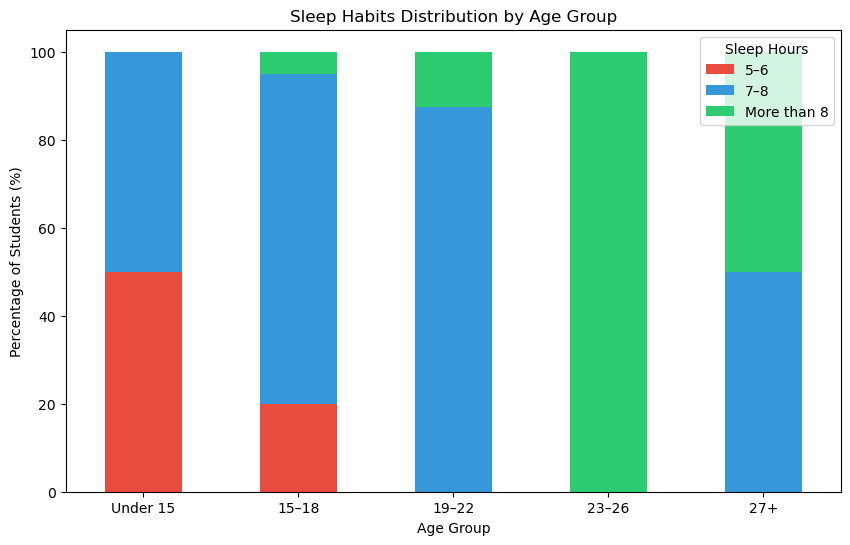

In [9]:
age_order = ['Under 15', '15–18', '19–22', '23–26', '27+']
sleep_order = ['5–6', '7–8', 'More than 8']
sleep_age_pct = pd.crosstab(df['age_group'], df['sleep_hours'], normalize='index') * 100

sleep_age_pct = sleep_age_pct.reindex(age_order)[sleep_order]

print(sleep_age_pct)

sleep_age_pct.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#e74c3c', '#3498db', '#2ecc71'])

plt.title('Sleep Habits Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Percentage of Students (%)')
plt.legend(title='Sleep Hours', loc='upper right')
plt.xticks(rotation=0)
plt.savefig('sleep_vs_age.png')